<a href="https://colab.research.google.com/github/ijamil1/Causal-Discovery-from-NELS-data/blob/main/pairs_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached yfinance-0.2.3-py2.py3-none-any.whl (50 kB)
  Using cached cryptography-38.0.4-cp36-abi3-manylinux_2_24_x86_64.whl (4.0 MB)
  Using cached beautifulsoup4-4.11.1-py3-none-any.whl (128 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [14]:
gas_oil_tickers = ['XOM','CVX','SHEL','TTE','COP','BP','SO']

In [16]:
tickers_str = ' '.join(gas_oil_tickers)
data = yf.download(tickers_str)

[*********************100%***********************]  7 of 7 completed


In [22]:
exit = False
idx = 0

while (idx < data.shape[0] and not exit):
  day_data = data.iloc[idx]
  openings = day_data.loc['Open']
  if openings.hasnans == False:
    exit = True
    print(idx)
  idx+=1


8263


In [24]:
non_null = data.iloc[8263:,:]

In [29]:
for col0 in ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']:
  for col1 in gas_oil_tickers:
    s = non_null[col0][col1]
    if s.hasnans:
      print('error')
      print(col0)
      print(col1)
      break

In [30]:
data = non_null
data = data[['Open','Close','Adj Close']]
data.head()

Open                                                  \
                  BP        COP      CVX    SHEL         SO      TTE   
Date                                                                   
1994-10-31  21.18750  13.959922  22.6875  29.125  12.218000  16.3125   
1994-11-01  20.81250  13.721698  22.3750  28.563  11.759825  16.5000   
1994-11-02  20.68750  13.721698  22.0625  28.219  11.683463  16.2500   
1994-11-03  20.84375  13.721698  22.0000  28.219  11.836188  16.1250   
1994-11-04  20.71875  13.674053  22.1250  27.781  11.759825  16.1250   

                         Close                      ...                      \
                 XOM        BP        COP      CVX  ...         SO      TTE   
Date                                                ...                       
1994-10-31  15.71875  21.18750  14.055212  22.5000  ...  12.141638  16.5000   
1994-11-01  15.56250  20.75000  13.721698  22.1875  ...  11.683463  16.3750   
1994-11-02  15.43750  20.65625  13.626408  21.9375  ...  11.836188  16.1250   
1994-11-03  15.50000  20.78125  13.721698  22.2500  ...  11.759825  16.1250   
1994-11-04  15.62500  20.37500  13.292895  21.8125  ...  11.530738  16.1875   

                     Adj Close                                          \
                 XOM        BP       COP       CVX      SHEL        SO   
Date                                                                     
1994-10-31  15.71875  6.094089  5.829416  8.144792  8.212989  3.119464   
1994-11-01  15.43750  5.968251  5.691088  8.031669  8.054507  3.046972   
1994-11-02  15.50000  5.941289  5.651569  7.941175  7.957505  3.086803   
1994-11-03  15.65625  5.977240  5.691088  8.054296  7.957505  3.066888   
1994-11-04  15.37500  5.860392  5.513244  7.978758  7.833992  3.007143   

                                
                 TTE       XOM  
Date                            
1994-10-31  4.774189  6.502167  
1994-11-01  4.738022  6.385825  
1994-11-02  4.665685  6.411682  
1994-11-03  4.665685  6.476316  
1994-11-04  4.683770  6.359974  

[5 rows x 21 columns]

In [31]:
data.tail()

Open                                                \
                   BP         COP         CVX       SHEL         SO   
Date                                                                  
2022-12-14  35.029999  114.750000  174.490005  57.380001  71.430000   
2022-12-15  34.529999  111.639999  170.600006  56.759998  70.650002   
2022-12-16  33.380001  110.449997  168.529999  54.939999  69.959999   
2022-12-19  34.220001  112.160004  170.110001  56.240002  69.169998   
2022-12-20  34.009998  110.449997  169.809998  55.980000  68.849998   

                                       Close                          ...  \
                  TTE         XOM         BP         COP         CVX  ...   
Date                                                                  ...   
2022-12-14  61.720001  107.989998  34.799999  112.870003  172.330002  ...   
2022-12-15  60.889999  105.330002  34.279999  112.550003  171.039993  ...   
2022-12-16  59.080002  103.690002  33.680000  110.440002  168.720001  ...   
2022-12-19  60.389999  105.260002  33.950001  110.440002  169.880005  ...   
2022-12-20  60.529999  105.169998  34.080002  112.650002  172.669998  ...   

                                              Adj Close              \
                   SO        TTE         XOM         BP         COP   
Date                                                                  
2022-12-14  71.110001  60.669998  106.459999  34.799999  112.870003   
2022-12-15  70.370003  60.360001  105.440002  34.279999  112.550003   
2022-12-16  69.430000  59.599998  104.699997  33.680000  110.440002   
2022-12-19  68.910004  59.950001  105.169998  33.950001  110.440002   
2022-12-20  69.470001  60.799999  106.690002  34.080002  112.650002   

                                                                     
                   CVX       SHEL         SO        TTE         XOM  
Date                                                                 
2022-12-14  172.330002  56.759998  71.110001  60.669998  106.459999  
2022-12-15  171.039993  56.150002  70.370003  60.360001  105.440002  
2022-12-16  168.720001  54.959999  69.430000  59.599998  104.699997  
2022-12-19  169.880005  55.520000  68.910004  59.950001  105.169998  
2022-12-20  172.669998  56.130001  69.470001  60.799999  106.690002  

[5 rows x 21 columns]

In [32]:
data.shape

(7086, 21)

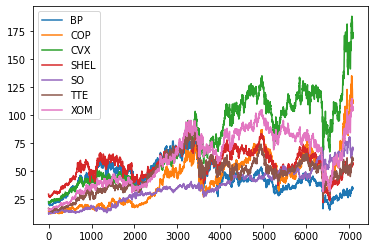

In [33]:
bp_close = data['Close']['BP']
cop_close = data['Close']['COP']
cvx_close = data['Close']['CVX']
shel_close = data['Close']['SHEL']
so_close = data['Close']['SO']
tte_close = data['Close']['TTE']
xom_close = data['Close']['XOM']

x = np.arange(0,data.shape[0])

plt.plot(x,bp_close,label='BP')
plt.plot(x,cop_close,label='COP')
plt.plot(x,cvx_close,label='CVX')
plt.plot(x,shel_close,label='SHEL')
plt.plot(x,so_close,label='SO')
plt.plot(x,tte_close,label='TTE')
plt.plot(x,xom_close,label='XOM')
plt.legend()
plt.show()

In [38]:
closing_prices_ar = np.vstack((bp_close,cop_close,cvx_close,shel_close,so_close,tte_close,xom_close))
closing_prices_ar


array([[ 21.1875    ,  20.75      ,  20.65625   , ...,  33.68000031,
         33.95000076,  34.08000183],
       [ 14.05521202,  13.72169781,  13.62640762, ..., 110.44000244,
        110.44000244, 112.65000153],
       [ 22.5       ,  22.1875    ,  21.9375    , ..., 168.72000122,
        169.88000488, 172.66999817],
       ...,
       [ 12.1416378 ,  11.6834631 ,  11.83618832, ...,  69.43000031,
         68.91000366,  69.47000122],
       [ 16.5       ,  16.375     ,  16.125     , ...,  59.59999847,
         59.95000076,  60.79999924],
       [ 15.71875   ,  15.4375    ,  15.5       , ..., 104.69999695,
        105.16999817, 106.69000244]])

In [40]:
corr_mat = np.corrcoef(closing_prices_ar)
  
corr_mat

array([[ 1.        ,  0.07457953, -0.09762662,  0.71460383, -0.22536261,
         0.60552549,  0.23373104],
       [ 0.07457953,  1.        ,  0.93335454,  0.55016491,  0.8198674 ,
         0.73575066,  0.86895778],
       [-0.09762662,  0.93335454,  1.        ,  0.47795343,  0.88165759,
         0.63247946,  0.88417337],
       [ 0.71460383,  0.55016491,  0.47795343,  1.        ,  0.19300852,
         0.77503048,  0.70836265],
       [-0.22536261,  0.8198674 ,  0.88165759,  0.19300852,  1.        ,
         0.54580961,  0.71154605],
       [ 0.60552549,  0.73575066,  0.63247946,  0.77503048,  0.54580961,
         1.        ,  0.82235226],
       [ 0.23373104,  0.86895778,  0.88417337,  0.70836265,  0.71154605,
         0.82235226,  1.        ]])

In [41]:
for i in range(7):
  row = corr_mat[i]
  argsort = np.argsort(row,axis=None)
  non_self_maxidx = argsort[5]
  print((i,non_self_maxidx))

(0, 3)
(1, 2)
(2, 1)
(3, 5)
(4, 2)
(5, 6)
(6, 2)


In [54]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/oil_prices.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  data.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
